In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
%%writefile test.py
from mpi4py import MPI
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# generate the signal

t=np.linspace(-20*2*np.pi, 20*2*np.pi, 3**9+6)
y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*np.pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t+10*2*np.pi)**2/2/5**2)
y=y+np.sin(4*t)*np.exp(-(t-7*2*np.pi)**2/2/5**2)


nwindowsteps=2000
window_width=2.0*2*np.pi
window_steps = np.linspace(t[0], t[-1], nwindowsteps)

start =  MPI.Wtime()

comm = MPI.COMM_WORLD
size=comm.Get_size()
rank=comm.Get_rank()

specgram = np.empty((len(t), nwindowsteps//size))
for i, window_position in enumerate(window_steps[rank*(nwindowsteps//size):(rank+1)*(nwindowsteps//size)]):
    window_function = np.exp(-(t-window_position)**2/2/window_width**2)
    y_window = y * window_function
    specgram[:,i] = abs(np.fft.fft(y_window))

final_specgram = np.array(comm.gather(specgram, root=0))
end = MPI.Wtime()

if rank==0:
    for i in range(1, size):
        specgram = np.append(specgram, final_specgram[i, :, :], axis=1)
    print(end-start)

Overwriting test.py


In [31]:
!mpirun --allow-run-as-root -n 1 python test.py

51.01830576799989


In [32]:
!mpirun --allow-run-as-root -n 2 python test.py

43.06568425600017


In [33]:
!mpirun --allow-run-as-root -n 3 python test.py

30.86722953000003


In [34]:
!mpirun --allow-run-as-root -n 4 python test.py

29.273588188000076


In [35]:
!mpirun --allow-run-as-root -n 5 python test.py

32.4300416760002


In [36]:
!mpirun --allow-run-as-root -n 6 python test.py

37.17839521399992


In [37]:
!mpirun --allow-run-as-root -n 7 python test.py

31.789868834000117


In [38]:
!mpirun --allow-run-as-root -n 8 python test.py

47.817895748999945


In [39]:
!mpirun --allow-run-as-root -n 9 python test.py

33.476865495999846


In [40]:
!mpirun --allow-run-as-root -n 10 python test.py

44.54133057499985


In [42]:
!mpirun --allow-run-as-root -n 11 python test.py

46.44608820500025


In [43]:
!mpirun --allow-run-as-root -n 12 python test.py

52.087850289000016


In [44]:
!mpirun --allow-run-as-root -n 13 python test.py

54.45516415699967


Text(0, 0.5, 'Speedup')

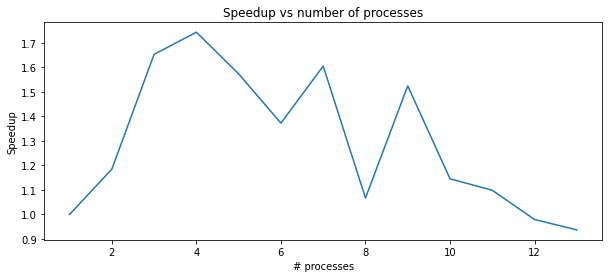

In [45]:
speedup = np.array([51.01830576799989,
                    43.06568425600017,
                    30.86722953000003,
                    29.273588188000076,
                    32.4300416760002,
                    37.17839521399992,
                    31.789868834000117,
                    47.817895748999945,
                    33.476865495999846,
                    44.54133057499985,
                    46.44608820500025,
                    52.087850289000016,
                    54.45516415699967])
speedup = speedup[0] / speedup
plt.figure(figsize=(10,4))
plt.title('Speedup vs number of processes')
plt.plot(np.arange(1,14), speedup)
plt.xlabel('# processes')
plt.ylabel('Speedup')